# 5_April_Assignment

### Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("diabetes.csv")

In [4]:
df.shape

(768, 9)

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

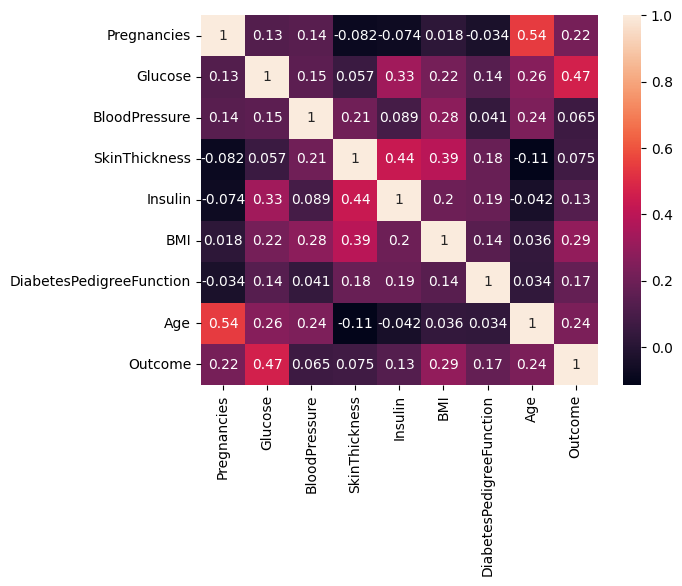

In [7]:
sns.heatmap(df.corr(),annot=True)

<Axes: >

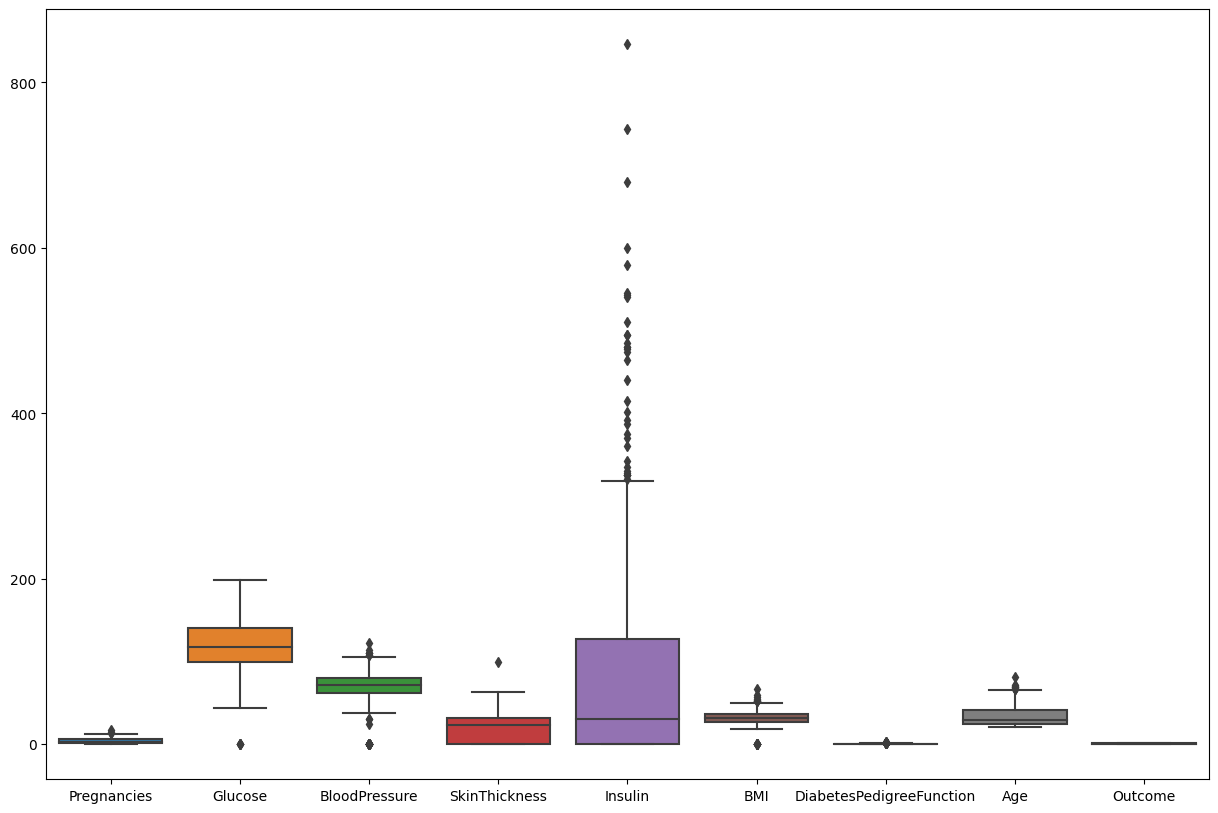

In [9]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=df,fliersize=5,ax=ax)

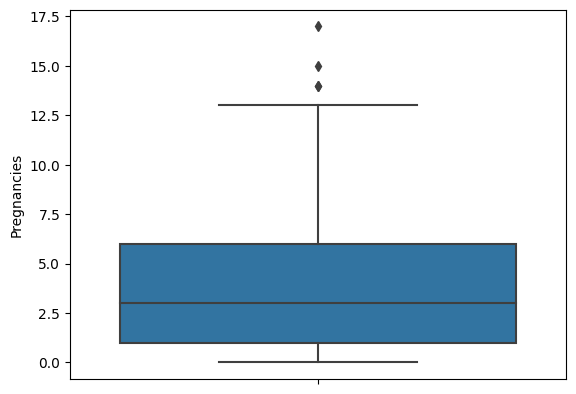

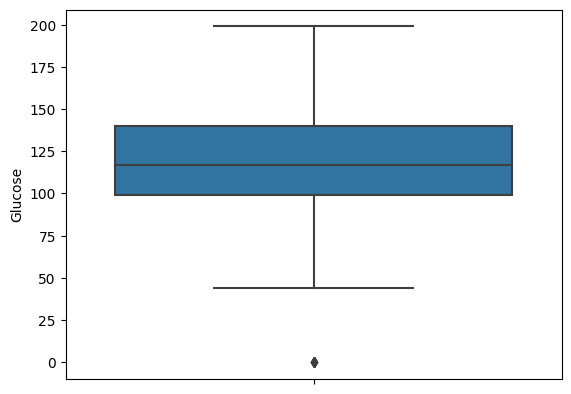

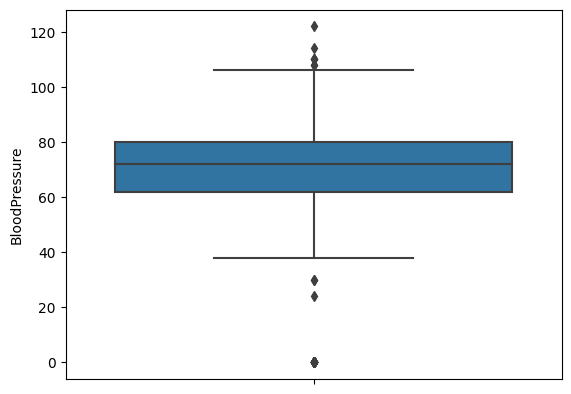

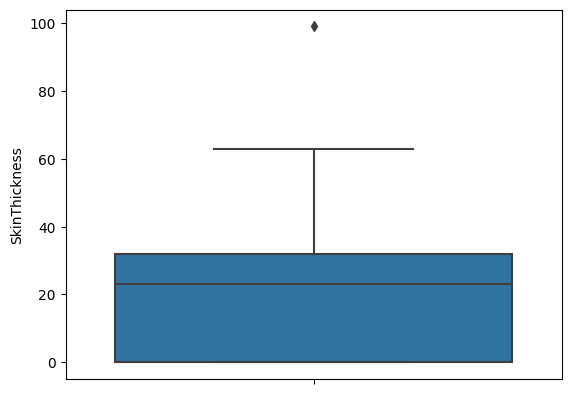

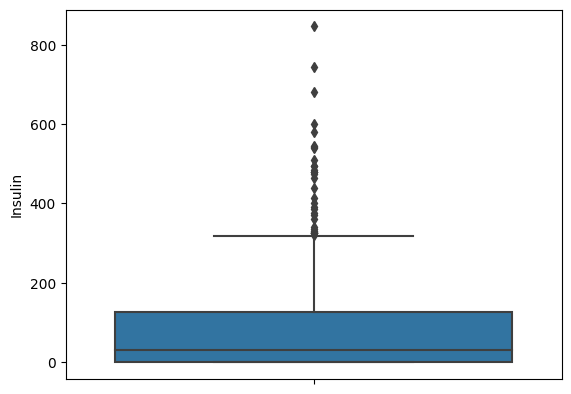

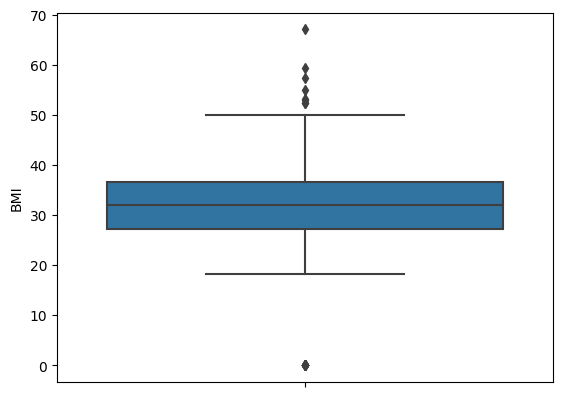

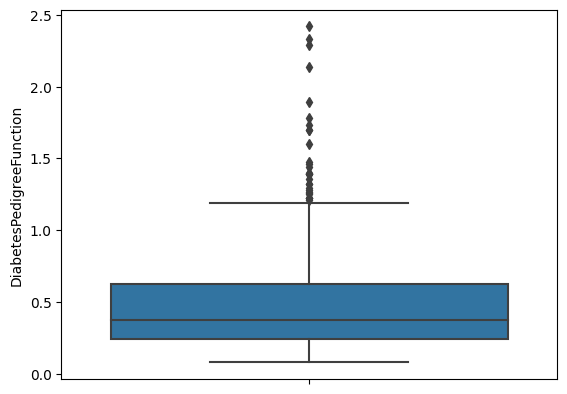

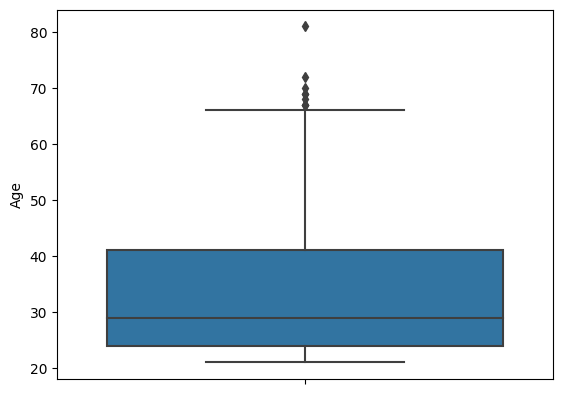

In [16]:
for col in df.columns[:-1]:
    sns.boxplot(y=col,data=df)
    plt.show()

### Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

In [17]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
import numpy as np
def remove_outliers(data,col):
    Q1=np.percentile(data[col],25)
    Q3=np.percentile(data[col],75)
    IQR=Q3-Q1
    lower_bound=Q1-(1.5)*IQR
    upper_bound=Q3+(1.5)*IQR
    return data[(data[col]>=lower_bound) & (data[col]<=upper_bound)]

In [21]:
for col in df.columns[:-1]:
    df=remove_outliers(df,col)

<Axes: >

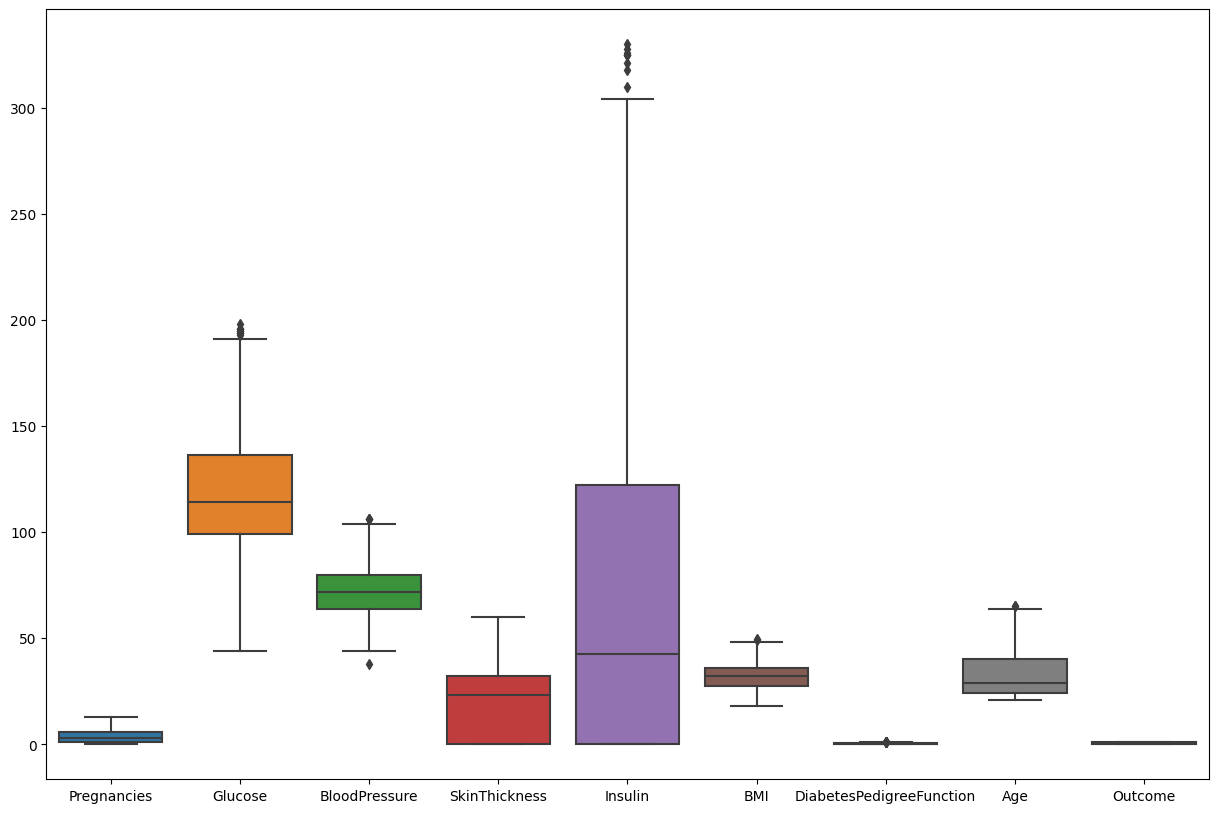

In [22]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=df,fliersize=5,ax=ax)

### Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [23]:
from sklearn.model_selection import train_test_split


In [24]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


In [25]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [26]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30


In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [28]:
x_train.shape,x_test.shape

((477, 8), (159, 8))

### Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [30]:
clf=DecisionTreeClassifier()

In [33]:
params={
    "criterion":["gini","entropy"],
    "max_depth":[3,5,7,9],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

In [34]:
grid_search=GridSearchCV(clf,params,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [35]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [40]:
best_clf=DecisionTreeClassifier(criterion='entropy',
 max_depth= 5,
 min_samples_leaf= 2,
 min_samples_split=2)

In [41]:
best_clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2)

### Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [43]:
from sklearn import metrics
y_pred=best_clf.predict(x_test)

In [44]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0], dtype=int64)

In [45]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Accuracy: 0.7672955974842768
Precision: 0.6
Recall: 0.4186046511627907
F1 Score: 0.49315068493150693


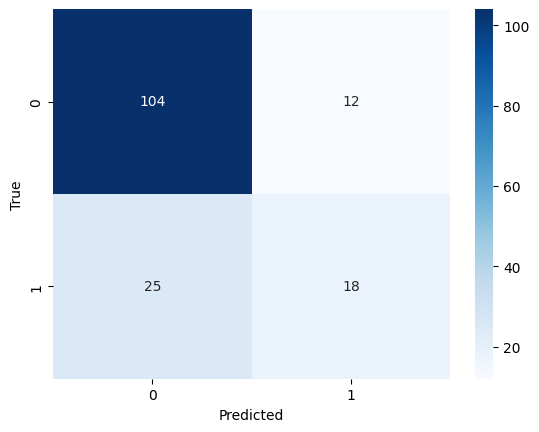

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### ROC Curve

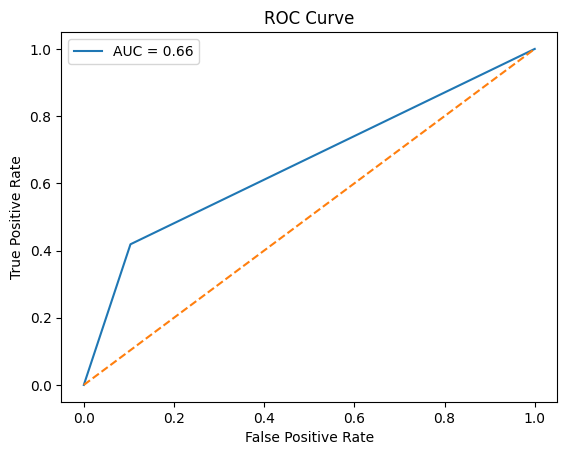

In [51]:
# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

# Calculate the AUC (area under the curve) of the ROC curve
auc = metrics.roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

### Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

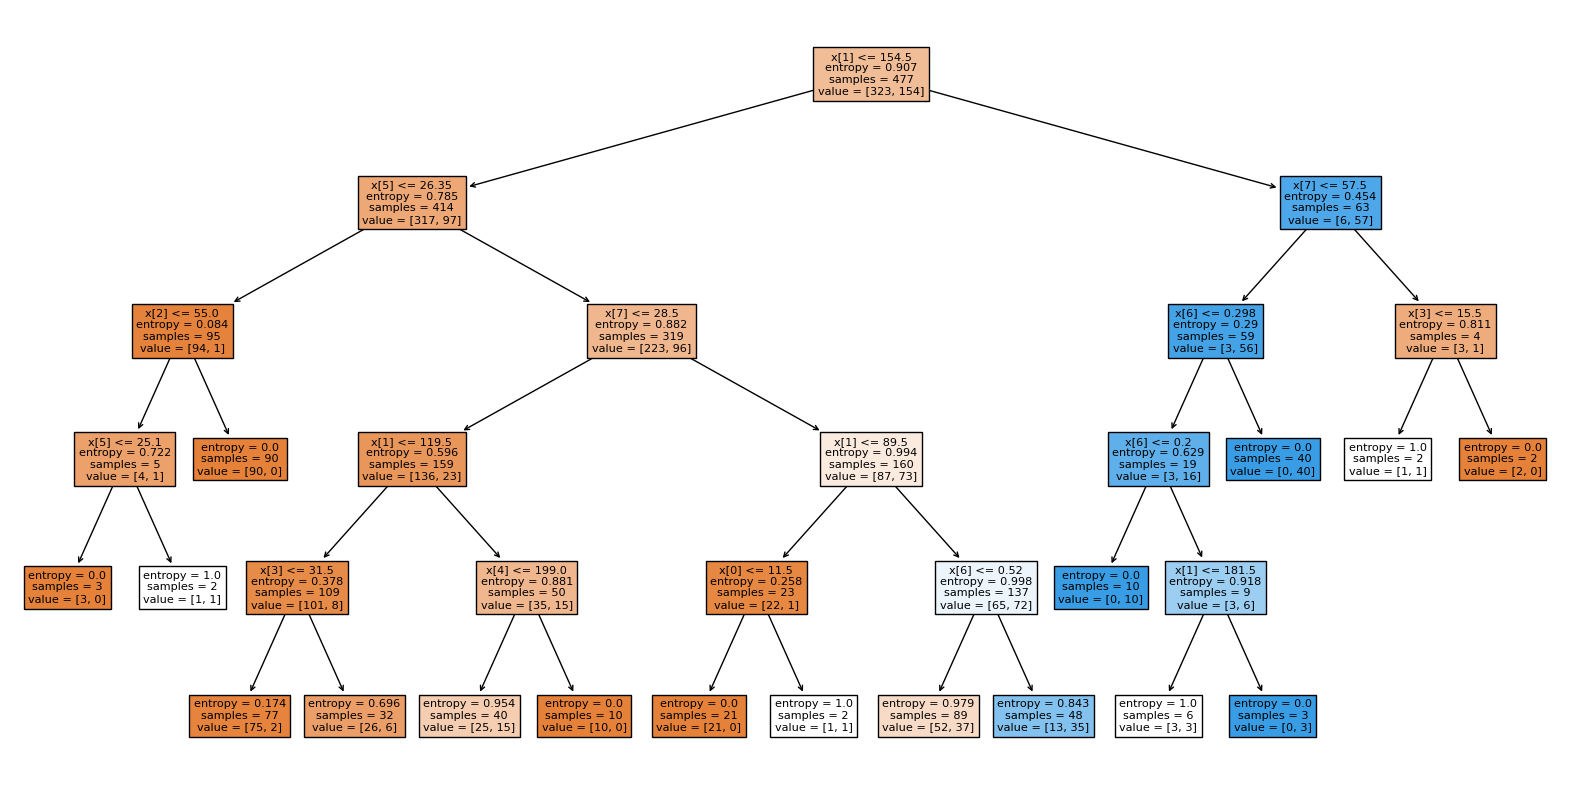

In [53]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(best_clf,filled=True)
plt.show()

### Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

One way to validate the decision tree model is to apply it to new data that was not used in training or testing. This can help determine if the model can generalize to unseen data and perform well in real-world scenarios. Another way to test the robustness of the model is to perform sensitivity analysis and scenario testing. To validate the decision tree model, we can apply it to new data that was not used for training or testing. This can help us assess the generalizability of the model and its ability to perform well on unseen data. Also, we can simulate different scenarios to test its robustness and generalizability.

One way to do this is to use a hold-out dataset, which is a set of data that was not used for training or tuning the model. We can apply the trained decision tree model to this hold-out dataset and evaluate its performance using the same metrics as before, such as accuracy, precision, recall, and F1 score. If the performance of the model on the hold-out dataset is similar to the performance on the test set, it suggests that the model is able to generalize well to new data.

Sensitivity analysis involves varying the input variables and observing the effect on the output. For example, we can test how sensitive the model is to changes in the threshold values used for splitting the nodes. We can also test how sensitive the model is to changes in the relative importance of the input variables.

Scenario testing involves simulating different scenarios and testing the model's performance under different conditions. For example, we can test how the model performs when the prevalence of diabetes in the population changes, or when the distribution of the input variables changes due to changes in the environment or population demographics.

Robustness testing involves testing the model's performance under different environmental conditions, such as changes in the data collection process or changes in the population being studied. This can help us determine if the model is still accurate and reliable in different contexts.

By performing sensitivity analysis and scenario testing, we can gain insights into the uncertainty and risks associated with the model and identify areas for improvement or further research.

Overall, validation is an important step in the model development process to ensure that the model is robust, accurate, and reliable in different scenarios and contexts. Validating a decision tree model involves assessing its performance on new data and testing its robustness and generalizability under different scenarios and conditions. This can help us gain confidence in the model's ability to make accurate predictions and support decision-making in real-world applications.

There are several ways to validate a decision tree model and test its robustness. Here are a few techniques:

* Cross-validation: Cross-validation is a technique that involves dividing the dataset into several subsets and using each subset as a test set while using the remaining subsets as the training set. This technique can help evaluate the model's performance on different subsets of the data and avoid overfitting.


* Holdout testing: Holdout testing involves splitting the dataset into two parts: a training set and a testing set. The model is trained on the training set and then tested on the testing set. This technique can help evaluate the model's performance on unseen data.


* Sensitivity analysis: Sensitivity analysis involves varying the input variables and observing how the output changes. This technique can help assess how sensitive the model is to changes in the data and can identify which variables have the greatest impact on the output.


* Scenario testing: Scenario testing involves testing the model's performance under different scenarios or assumptions. For example, one might test the model's performance if there is missing data, if there are errors in the input data, or if the distribution of the input data changes.